In [2]:
import pandas as pd
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [3]:
digits = datasets.load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
df = pd.DataFrame(digits.data,digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('target',axis='columns')
y = df.target
X_train, X_test,y_train ,y_test = train_test_split(X,y,test_size=0.33)

In [12]:
len(X_train)

1203

In [13]:
len(X_test)

594

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
knn.score(X_test,y_test)

0.9848484848484849

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm


array([[62,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 71,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 64,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 68,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 63,  0,  0],
       [ 0,  4,  1,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  1,  0, 54]], dtype=int64)

Text(42.0, 0.5, 'Predicted')

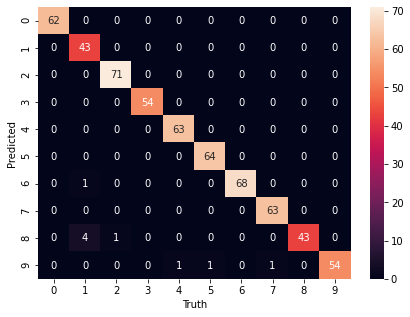

In [22]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      0.90      0.95        48
           2       1.00      0.99      0.99        72
           3       1.00      1.00      1.00        54
           4       1.00      0.98      0.99        64
           5       1.00      0.98      0.99        65
           6       0.99      1.00      0.99        68
           7       1.00      0.98      0.99        64
           8       0.90      1.00      0.95        43
           9       0.95      1.00      0.97        54

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.99      0.98      0.98       594



In [43]:
kn = range(1,20)

for k in kn:
    ideal_knn = KNeighborsClassifier(n_neighbors=k)
    ideal_knn.fit(X_train,y_train)
    score = (ideal_knn.score(X_test,y_test))
    print("no. of neighbours" + str(k) +" -> score " + str(score))
    
    




no. of neighbours1 -> score 0.9865319865319865
no. of neighbours2 -> score 0.9848484848484849
no. of neighbours3 -> score 0.9882154882154882
no. of neighbours4 -> score 0.9848484848484849
no. of neighbours5 -> score 0.9865319865319865
no. of neighbours6 -> score 0.9848484848484849
no. of neighbours7 -> score 0.9865319865319865
no. of neighbours8 -> score 0.9865319865319865
no. of neighbours9 -> score 0.9831649831649831
no. of neighbours10 -> score 0.9848484848484849
no. of neighbours11 -> score 0.9797979797979798
no. of neighbours12 -> score 0.9797979797979798
no. of neighbours13 -> score 0.9781144781144782
no. of neighbours14 -> score 0.9797979797979798
no. of neighbours15 -> score 0.9781144781144782
no. of neighbours16 -> score 0.9781144781144782
no. of neighbours17 -> score 0.9747474747474747
no. of neighbours18 -> score 0.9747474747474747
no. of neighbours19 -> score 0.9730639730639731
